# Challenge Data - Module introduction à l'IA

## Classification des images de 1 et de 6

# I. Visualisation des données

On commence par importer les données dont nous aurons besoin :

In [9]:
from utilitaires_mnist_2 import *

## I.1 Rappels Python

### Le type list

On définit une liste à l'aide de crochets (rajoutez des print après chaque définition)  :

In [ ]:
# liste vide :
liste_vide = []
# une liste peut contenir des nombres :
liste = [1, 5.4, -3]

On accède à l'élément $i$ d'une liste en faisant
`ma_liste[i]`.

<div class="alert alert-block alert-warning">
<b>⚠️ Attention  :</b> En Python les indices sont comptés à partir de 0, le premier élément d'une liste est donc liste[0].
</div>

Avec la fonction `print(...)`, afficher le premier élément de la liste `liste`` :

In [ ]:
# Afficher le premier élément de la liste
...

Pour ajouter des éléments à une liste, on peut utiliser la méthode `append` :

In [ ]:
# Ajouter "8" à la liste


## I.2 Image numérique

Une image en niveaux de gris : tableau 2D de $28 \times 28$ pixels. La valeur de chaque pixel est un entier compris entre 0 et 255.

Nous avons créé une fonction `affichage`, vous pouvez directement l'appliquer à la variable `x` :

In [ ]:
# Affichez l'image x :
affichage(x)

### Accéder à un pixel particulier

On accède à la valeur du pixel $(i,j)$ à la $i+1$-ème ligne et $j+1$-ème par la commande `x[i,j]`. Par exemple, pour accéder à la valeur du pixel central (14,14) on écrit simplement `x[14,14]`. On peut ensuite afficher cette valeur avec `print`.

In [ ]:
# Vérifiez que pour notre image x, le pixel central est de valeur 0 et apparaît donc noir


### Accéder à une « tranche » de pixels

* `x[a:b,c:d]` extrait les pixels appartenant aux lignes `a` à `b-1` (inclus) et colonnes `c` à `d-1` (inclus).
* `x[a:b,c:d]` est un tableau de taille $(b-a) \times (d-c)$.
* Pour récupérer tous les pixels de `x` appartenant aux colonnes `c` à `d-1`, on utilise `x[:,c:d]`; et `x[a:b,:]` pour tous les pixels appartenant aux lignes `a` à `b-1`.

<b><font color=red> Écrire une ligne de code pour afficher uniquement les colonnes 11 à 23 de l'image $x$ :</font></b>

In [ ]:
# Visualisez les colonnes 11 à 23 de l'image x :


In [ ]:
# Affichez directement la valeur des pixels des colonnes 11 à 23 de l'image x :


# II. Challenge : classer les chiffres 1 et 6

In [ ]:
# Affichez la première image de `x_train` :
affichage(x_train[0])

# Affichez la deuxième image de `x_train` :
affichage(x_train[1])

# Affichez la 9eme image de `x_train` :
affichage(x_train[10])


Pour visualiser les 10 premières images, utiliser la fonction `affichage_dix` :

In [ ]:
# Affiche les 10 premières images de x_train :
affichage_dix(x_train)

## II.1 Choix a priori de la caractéristique

**Benchmark :** Proposition d'un caractéristiques utilisée comme référence

In [2]:
# Une fonction qui calcule et renvoi la caractéristique de l'image x

def caracteristique(x):
    c = moyenne(x)
    return c

<b><font color=red> Après être allé une première fois jusqu’au bout de ce Notebook</font></b>, vous définirez ci-dessous votre propre caractéristique en modifiant la cellule suivante :

In [ ]:
# Une fonction qui calcule et renvoi la caractéristique de l'image x

def caracteristique(x):

    c = ...

    return c

## II.2 Classificateur

**Algorithme de classification :**
* On choisit un seuil noté `s`
* On compare la caractéristique de l'image à `s` et on renvoi l'entier $0$ ou $1$ :

**Choix du seuil**
Afficher les valeurs de caractéristiques pour des images de `x_train` :

In [ ]:
affichage_dix(x_train)

for i in range(10):
    c = caracteristique(x_train[i])
    y = y_train[i]
    print('Image ' +str(i+1)+' : c(x) = '+str(c)+',   y = '+str(y)+'\n')

<b><font color=red> D'après ces obervations, choisissez un seuil `s` et complétez la fonction classification :</font></b>

In [3]:
# Seuil à compléter :

s = 25

# Algorithme de classification :
def classification(x, s):
    c = caracteristique(x)
    if c > s:
        return 1
    else:
        return -1

## II.3 Calcul de l'erreur d'entraînement pour ce paramètre

Pour calculer l'erreur d'entraînement : 
- on calcule d'abord l'erreur par image, avec ``erreur_image(x, y, s)``
- puis on calcule la moyenne des erreurs par images, avec ``erreur_train(x_train, y_train, s)``

Notez que ces deux fonctions dépendent du paramètre ``s``.  

<b><font color=red> Exécuter la cellule pour définir ces deux fonctions (déjà écrites) :</font></b>

In [ ]:
# Fonction qui calcule l'erreur pour une image x, en fonction de la réponse y et du paramètre s
def erreur_image(x, y, s):
    c = caracteristique(x)
    y_est = classification(x, s)
    
    if y_est == y:
        erreur = 0
    else:
        erreur = 1
        
    return erreur

# Fonction qui calcule la moyenne des erreur par image pour donner l'erreur d'entrainement
def erreur_train(x_train, y_train, s):
    liste_erreurs = []

    for i in range(N):
        x = x_train[i]
        y = y_train[i]
        
        erreur = erreur_image(x, y, s)
        liste_erreurs.append(erreur)
        
    return moyenne(liste_erreurs)

<b><font color=red> Exécuter la cellule suivante pour calculer votre erreur d'entraînement :</font></b>

In [ ]:
# calcul de l'erreur d'entraienement grâce 

e_train = erreur_train(x_train, y_train, s)
print("\n \n --> Erreur d'entraînement =", f"{100*e_train:.2f}% \n \n")

Qu'en pensez-vous ? Nous allons maintenant chercher le paramètre s qui minimse la fonction erreur.

## II.4 Minimisation de la fonction erreur

Pour trouver le meilleur paramètre ``s`` nous traçons la fonction $e_{train}(s)$ pour trouver son minimum. 

<b><font color=red> Exécuter la cellule suivante pour afficher la fonction erreur :</font></b>

Calculating:   0%|          | 0/40 [00:00<?, ?it/s]

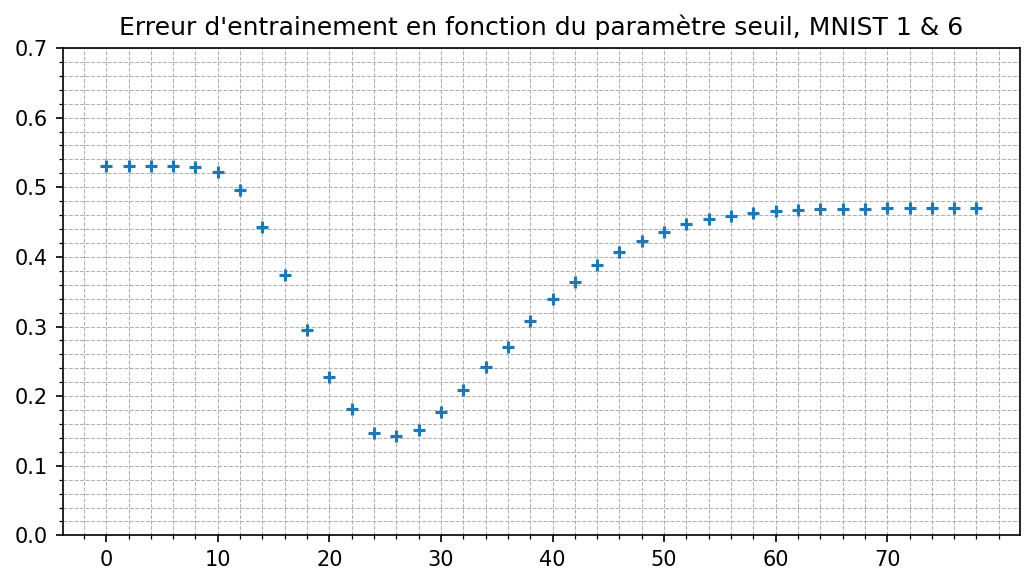

In [12]:
s_min = 0
s_max = 80
pas = 2

tracer_erreur(s_min, s_max,pas, classification)

<br>
 
<b><font color=blue> 1. Quelle valeur de ``s`` pouvez prendre pour avoir le moins d'erreur ? </font></b>
<br>

<br>
<b><font color=blue> 2. Retournez à la section II.2 pour mettre à jour la valeur de ``s`` et faites tourner les cellules de II.2 à II.3 pour afficher votre nouveau score. </font></b>
<br>

<br>
<b><font color=blue> 3. Retournez à la section II.1 pour définir votre propre caractéristique et diminuer encore l'erreur.</font></b> <b><font color=red>Essayer d'obtenir l'erreur la plus faible possible ! </font></b>

Pensez à optimiser la valeur de ``s`` pour chaque nouvelle caractéristique, et éventuellement à échanger les rôles de -1 et 1 dans le code de la fonction ``classification``. 

## II.4 Soumission sur la plateforme pour obtenir l'erreur de test


<b><font color=red>Une fois que vous être content de votre caractéristique,</font></b> exécuter la cellule suivante : 

In [ ]:
y_est_test = []

for x in x_test_2:
    y_est_test.append(classification(x))

# Sauvez et téléchargez vos estimations y_est_test, en entrant le nom du fichier que vous souhaitez
sauver_et_telecharger_mnist_2(y_est_test, 'y_est_test_mnist2.csv')

<b><font color=red>Soumettez ce fichier .csv sur la plateforme Challenge Data</font></b> afin d'obtenir votre erreur de test en cliquant sur **[ce lien](https://challengedata.ens.fr/challenges/116)** (n'oubliez pas au préalable d'être bien connecté).

Quelle est votre erreur de test ?

In [44]:
import matplotlib.pyplot as plt

classes = y_train[0:10]

def affichage_dix(images, classes):
    fig, ax = plt.subplots(1, 10, figsize=(8,2)) # Ajustez la taille pour avoir de l'espace pour les labels
    for k in range(10):
        ax[k].imshow(images[k], cmap='gray')
        ax[k].set_xticks([])
        ax[k].set_yticks([])
        ax[k].set_xlabel(classes[k], fontsize=12)  # Ajoutez les labels ici
        
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.2, hspace=0.6)
    plt.show()
    plt.close()


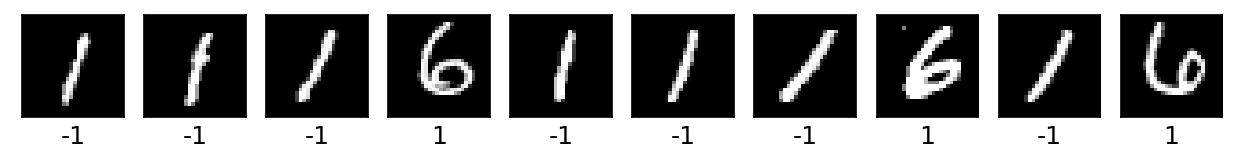

In [45]:
affichage_dix(x_train, classes)

In [24]:
import matplotlib.pyplot as plt

def affichage_dix(images, classes):
    fig, ax = plt.subplots(2, 10, figsize=(10, 2))
    
    # Cachez les axes des subplots
    for i in range(2):
        for j in range(10):
            ax[i, j].axis('off')
    
    # Définissez les en-têtes des colonnes
    ax[0, 0].text(0, 0.5, 'Image', va='center', ha='center', fontsize=12, fontweight='bold')
    ax[1, 0].text(0, 0.5, 'Classe', va='center', ha='center', fontsize=12, fontweight='bold')
    
    # Affichez les images et les classes
    for k in range(10):
        ax[0, k].imshow(images[k], cmap='gray')
        ax[1, k].text(0.5, 0.5, str(classes[k]), va='center', ha='center', fontsize=12)
    
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.05, hspace=0.05)
    plt.show()
    plt.close()


<ipython-input-26-84f8540ab7ce>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  table = ax.table(cellText=cellText, cellColours=cellColours,


AttributeError: 'Table' object has no property 'cellpadding'

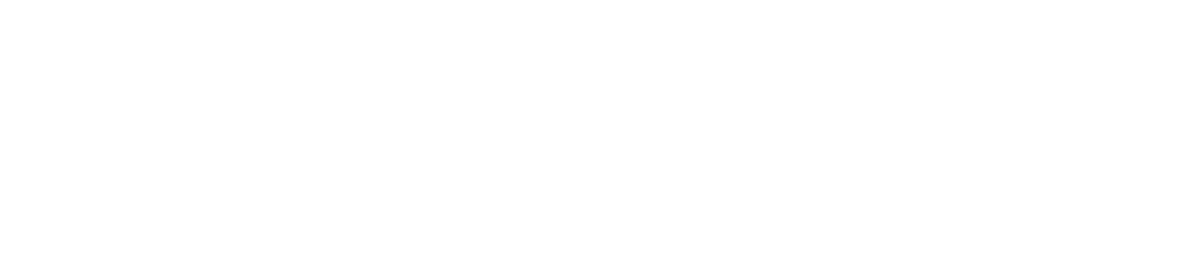

In [27]:
affichage_dix(x_train, classes)

In [26]:
import matplotlib.pyplot as plt

def affichage_dix(images, classes):
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.axis('tight')
    ax.axis('off')
    
    cellText = [['' for j in range(10)] for i in range(2)]
    cellColours = [[None for j in range(10)] for i in range(2)]
    
    for i in range(10):
        ax.imshow(images[i], cmap='gray', extent=[i*1.1, (i+1)*1.1, 1.5, 2.5], aspect='auto', interpolation='none')
        cellText[1][i] = str(classes[i])
        cellColours[1][i] = 'lightgray'
    
    table = ax.table(cellText=cellText, cellColours=cellColours, 
                     colLabels=['Image {}'.format(i) for i in range(1, 11)], 
                     loc='bottom', cellLoc = 'center', cellPadding=5)

    plt.show()